## Final Project Submission

Please fill out:
* Student name: John Ofrecio 
* Student pace: Part-Time 
* Scheduled project review date/time: 
* Instructor name: James Irving 
* Blog post URL:


# Importing Libraries and Packages 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt

#STATSMODELS
import statsmodels.api as sm
from statsmodels.formula.api import ols

#SCI-KIT LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error


data = pd.read_csv("kc_house_data.csv")
pd.set_option('display.max_columns' ,0) #displaying all columns 
data.head() #check first 5 rows 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
data.tail() #check last 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [3]:
column_names = data.columns #list of all column names 
print(column_names) 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [4]:
data.info() #housing data information and also to see if there are any missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Observation: 

* There are a total of **21,597** rows and **21** columns
* 3 Columns (**waterfront, view, yr_renovated,**) seems to have some data missing. 
* **waterfront, view, and condition** seem to be categorical 
* **date, sqft_basement** are classified as objects
* **sqft_basement** not all houses have basements and is also marked as an object 

# Getting Rid of Columns that does not really contribute informatin 
   Dropping **ID** and **Date**  

In [5]:
data.drop(['id','date'], axis = 1, inplace =True)# in place TRUE to make sure that the dropped is successful within the dataframe

In [6]:
data.head()#columns dropped

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
data.isna().sum() #looking at how much missing data 
nulls = data.isnull().sum() #nice trick from James to whittle down which columns have missing data 
print(nulls[nulls > 0])

waterfront      2376
view              63
yr_renovated    3842
dtype: int64


In [8]:
data.dropna(subset = ['view'], inplace = True)#dropping rows in view since it's missing less than 1% of values

In [9]:
data.isnull().sum() / len(data.index) #checking again and now view has 0% missing data
                                      #what to do with the rest? 

price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110059
view             0.000000
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177858
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [10]:
data['waterfront'].describe()

count    19164.000000
mean         0.007566
std          0.086657
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [11]:
data['waterfront'].fillna(data['waterfront'].median(), inplace=True)

In [12]:
data.isnull().sum() / len(data.index)

price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
view             0.000000
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177858
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

In [13]:
data['yr_renovated'].describe()

count    17704.000000
mean        83.765025
std        400.239690
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [14]:
data.groupby('yr_renovated')['price'].describe().round(3)#i see that for yr_renovated with NaN, std = mean

,count,mean,std,min,25%,50%,75%,max
yr_renovated,,,,,,,,
0.0,16961.0,530401.031,348593.885,80000.0,320000.00,447500.0,633000.0,6890000.0
1934.0,1.0,459950.000,NaN,459950.0,459950.00,459950.0,459950.0,459950.0
1940.0,2.0,378400.000,92065.303,313300.0,345850.00,378400.0,410950.0,443500.0
1944.0,1.0,521000.000,NaN,521000.0,521000.00,521000.0,521000.0,521000.0
1945.0,3.0,398666.667,155853.564,256000.0,315500.00,375000.0,470000.0,565000.0
1946.0,1.0,550000.000,NaN,550000.0,550000.00,550000.0,550000.0,550000.0
1948.0,1.0,410000.000,NaN,410000.0,410000.00,410000.0,410000.0,410000.0
1950.0,1.0,152900.000,NaN,152900.0,152900.00,152900.0,152900.0,152900.0
1951.0,1.0,276000.000,NaN,276000.0,276000.00,276000.0,276000.0,276000.0


In [15]:
# Using Binary Code and creating new column that makes it easier whether a house has been renovated (1) or not (0) 

In [16]:
data['yr_renovated'].replace(0.0,np.nan,inplace=True)

In [17]:
nan = data['yr_renovated'].loc[data['yr_renovated'].isna()].index #getting index to create a new column 
notnan = data['yr_renovated'].loc[~data['yr_renovated'].isna()].index

In [18]:
data['new_yr_renovated'] = data['yr_renovated'].copy 
data['new_yr_renovated'][nan] = 0
data['new_yr_renovated'][notnan] = 1

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
price               21534 non-null float64
bedrooms            21534 non-null int64
bathrooms           21534 non-null float64
sqft_living         21534 non-null int64
sqft_lot            21534 non-null int64
floors              21534 non-null float64
waterfront          21534 non-null float64
view                21534 non-null float64
condition           21534 non-null int64
grade               21534 non-null int64
sqft_above          21534 non-null int64
sqft_basement       21534 non-null object
yr_built            21534 non-null int64
yr_renovated        743 non-null float64
zipcode             21534 non-null int64
lat                 21534 non-null float64
long                21534 non-null float64
sqft_living15       21534 non-null int64
sqft_lot15          21534 non-null int64
new_yr_renovated    21534 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 4

/Users/johnofrecio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/johnofrecio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
data.drop(['yr_renovated'], axis = 1, inplace =True) #dropping yr_renovated

In [20]:
data.isnull().sum() / len(data.index) #no more missing data 

price               0.0
bedrooms            0.0
bathrooms           0.0
sqft_living         0.0
sqft_lot            0.0
floors              0.0
waterfront          0.0
view                0.0
condition           0.0
grade               0.0
sqft_above          0.0
sqft_basement       0.0
yr_built            0.0
zipcode             0.0
lat                 0.0
long                0.0
sqft_living15       0.0
sqft_lot15          0.0
new_yr_renovated    0.0
dtype: float64

# Categorical Values

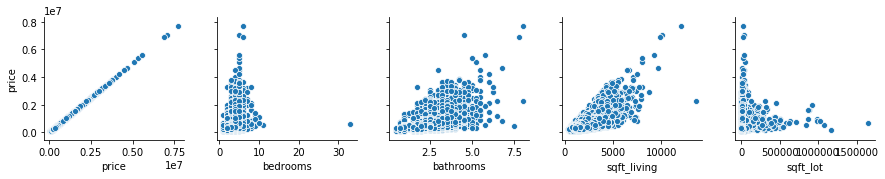

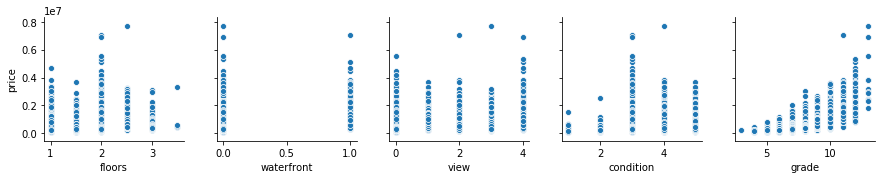

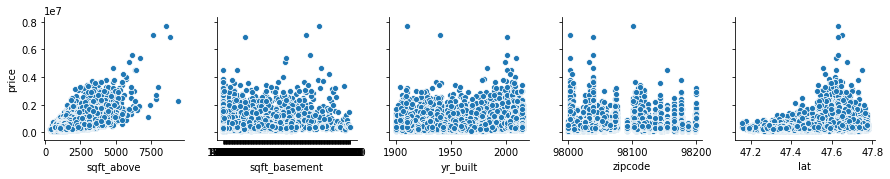

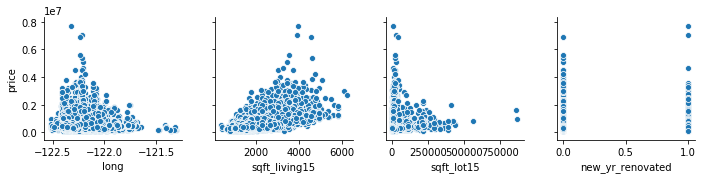

In [21]:
for i in range(0, len(data.columns), 5): #visualizing comparing characteristics to price 
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['price'])

In [22]:
data.describe().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,new_yr_renovated
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,540057.664,3.373,2.116,2079.828,15090.596,1.494,0.007,0.234,3.410,7.657,1788.558,1971.002,98077.939,47.560,-122.214,1986.300,12751.080,0.035
std,366059.581,0.926,0.769,917.447,41380.210,0.540,0.082,0.766,0.651,1.173,827.746,29.376,53.507,0.139,0.141,685.121,27255.483,0.183
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,98001.000,47.156,-122.519,399.000,651.000,0.000
25%,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,98033.000,47.471,-122.328,1490.000,5100.000,0.000
50%,450000.000,3.000,2.250,1910.000,7617.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,98065.000,47.572,-122.230,1840.000,7620.000,0.000
75%,645000.000,4.000,2.500,2550.000,10687.750,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,98118.000,47.678,-122.125,2360.000,10083.000,0.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,1.000


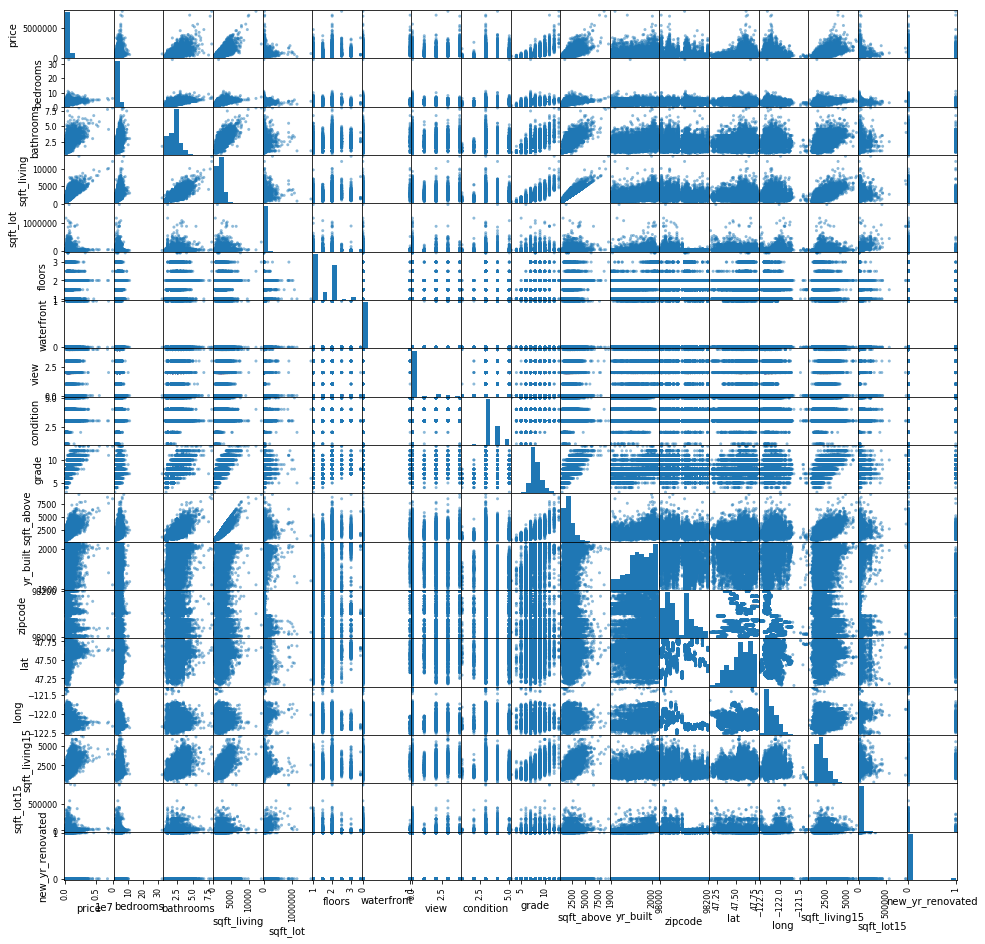

In [23]:
fig = pd.plotting.scatter_matrix(data, figsize=(16,16));

# Observation
**Categorical Values**: view, waterfront, zipcode

**Ordinal Data**: bedrooms, bathrooms, floors, view, grade,  

# Transforming Categorical Values 

In [24]:
data.info() #sqft_basement is an object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
price               21534 non-null float64
bedrooms            21534 non-null int64
bathrooms           21534 non-null float64
sqft_living         21534 non-null int64
sqft_lot            21534 non-null int64
floors              21534 non-null float64
waterfront          21534 non-null float64
view                21534 non-null float64
condition           21534 non-null int64
grade               21534 non-null int64
sqft_above          21534 non-null int64
sqft_basement       21534 non-null object
yr_built            21534 non-null int64
zipcode             21534 non-null int64
lat                 21534 non-null float64
long                21534 non-null float64
sqft_living15       21534 non-null int64
sqft_lot15          21534 non-null int64
new_yr_renovated    21534 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.9+ MB


In [25]:
basement = data['sqft_basement']
basement_series = pd.Series(basement)
basement_series

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6             ?
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18            ?
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
30          0.0
          ...  
21566     280.0
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581         ?
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

In [26]:
basement_series.describe()

count     21534
unique      302
top         0.0
freq      12798
Name: sqft_basement, dtype: object

In [27]:
cat_basement= basement_series.astype('category')
cat_basement

0           0.0
1         400.0
2           0.0
3         910.0
4           0.0
5        1530.0
6             ?
8         730.0
9           0.0
10       1700.0
11        300.0
12          0.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
18            ?
19          0.0
20        760.0
21        720.0
22          0.0
23          0.0
24          0.0
25          0.0
26        700.0
27          0.0
28        730.0
29          0.0
30          0.0
          ...  
21566     280.0
21567       0.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579      50.0
21580       0.0
21581         ?
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: sqft_basement, Len

In [28]:
coded_basement = cat_basement.cat.codes
coded_basement

0          0
1        207
2          0
3        289
4          0
5         73
6        301
8        262
9          0
10        93
11       191
12         0
13         0
14         0
15       298
16         0
17         0
18       301
19         0
20       265
21       261
22         0
23         0
24         0
25         0
26       258
27         0
28       262
29         0
30         0
        ... 
21566    185
21567      0
21568    194
21569      0
21570      0
21571      0
21572    119
21573      0
21574    107
21575      0
21576      0
21577      0
21578      0
21579    224
21580      0
21581    301
21582      0
21583      0
21584      0
21585      0
21586      0
21587      0
21588      0
21590    289
21591     43
21592      0
21593      0
21594      0
21595      0
21596      0
Length: 21534, dtype: int16

In [117]:
data['coded_basement'] = coded_basement
data.head()

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_lot15,new_yr_renovated,bathrooms_log,sqft_living15_log,coded_basement
0,221900.0,3,5650,1.0,0.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,5650,0,0.000000,7.200425,0
1,538000.0,3,7242,2.0,0.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,7639,1,0.810930,7.432484,207
2,180000.0,2,10000,1.0,0.0,0.0,3,6,0.0,1933,98028,47.7379,-122.233,8062,0,0.000000,7.908387,0
3,604000.0,4,5000,1.0,0.0,0.0,5,7,910.0,1965,98136,47.5208,-122.393,5000,0,1.098612,7.215240,289
4,510000.0,3,8080,1.0,0.0,0.0,3,8,0.0,1987,98074,47.6168,-122.045,7503,0,0.693147,7.495542,0


In [118]:
data.drop(['sqft_basement'], axis = 1, inplace =True)
data.head()

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_lot15,new_yr_renovated,bathrooms_log,sqft_living15_log,coded_basement
0,221900.0,3,5650,1.0,0.0,0.0,3,7,1955,98178,47.5112,-122.257,5650,0,0.000000,7.200425,0
1,538000.0,3,7242,2.0,0.0,0.0,3,7,1951,98125,47.7210,-122.319,7639,1,0.810930,7.432484,207
2,180000.0,2,10000,1.0,0.0,0.0,3,6,1933,98028,47.7379,-122.233,8062,0,0.000000,7.908387,0
3,604000.0,4,5000,1.0,0.0,0.0,5,7,1965,98136,47.5208,-122.393,5000,0,1.098612,7.215240,289
4,510000.0,3,8080,1.0,0.0,0.0,3,8,1987,98074,47.6168,-122.045,7503,0,0.693147,7.495542,0


# Multicollinearity 

In [119]:
data.corr().round(3)

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_lot15,new_yr_renovated,bathrooms_log,sqft_living15_log,coded_basement
price,1.000,0.308,0.090,0.257,0.259,0.396,0.035,0.668,0.054,-0.054,0.308,0.022,0.083,0.118,0.456,0.544,0.076
bedrooms,0.308,1.000,0.033,0.177,-0.004,0.079,0.026,0.356,0.155,-0.154,-0.010,0.132,0.031,0.018,0.508,0.406,0.077
sqft_lot,0.090,0.033,1.000,-0.005,0.021,0.075,-0.008,0.115,0.053,-0.130,-0.085,0.230,0.717,0.005,0.076,0.145,-0.046
floors,0.257,0.177,-0.005,1.000,0.020,0.028,-0.264,0.459,0.489,-0.059,0.049,0.125,-0.011,0.003,0.501,0.275,-0.203
waterfront,0.259,-0.004,0.021,0.020,1.000,0.382,0.016,0.081,-0.025,0.029,-0.012,-0.038,0.031,0.075,0.046,0.075,0.009
view,0.396,0.079,0.075,0.028,0.382,1.000,0.046,0.250,-0.055,0.085,0.006,-0.078,0.073,0.090,0.158,0.263,0.087
condition,0.035,0.026,-0.008,-0.264,0.016,0.046,1.000,-0.147,-0.361,0.002,-0.016,-0.105,-0.003,-0.055,-0.113,-0.089,0.101
grade,0.668,0.356,0.115,0.459,0.081,0.250,-0.147,1.000,0.448,-0.186,0.114,0.201,0.121,0.015,0.644,0.689,-0.008
yr_built,0.054,0.155,0.053,0.489,-0.025,-0.055,-0.361,0.448,1.000,-0.347,-0.148,0.410,0.071,-0.203,0.534,0.334,-0.138
zipcode,-0.054,-0.154,-0.130,-0.059,0.029,0.085,0.002,-0.186,-0.347,1.000,0.267,-0.564,-0.148,0.062,-0.227,-0.290,0.141


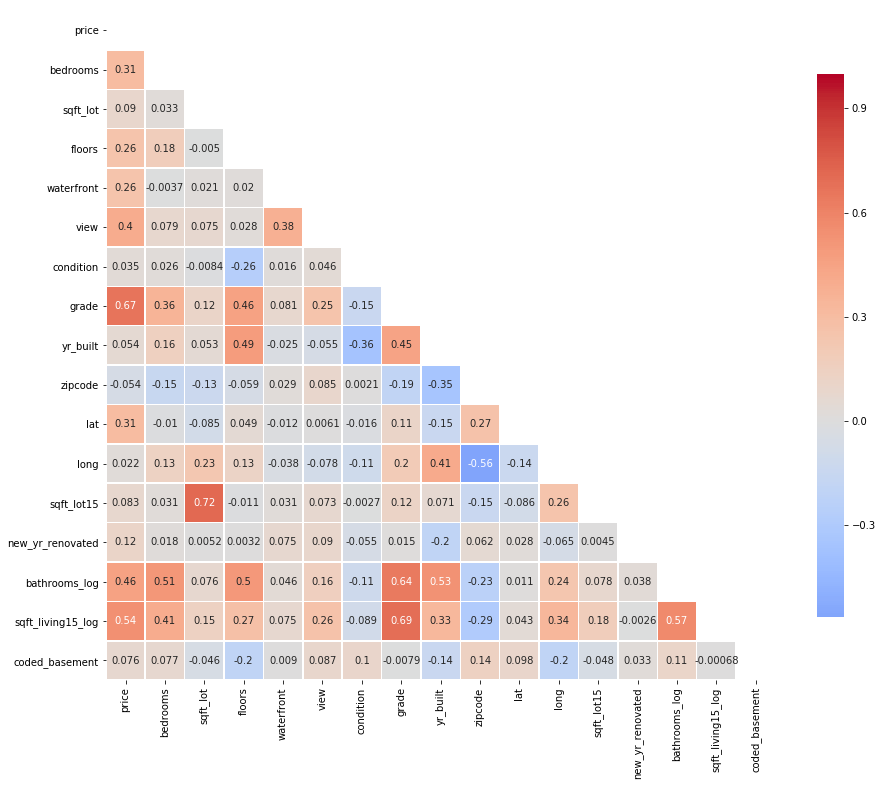

In [120]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

# Observation: 
   **sqft_living** and **sqft_above** show high correality 

In [121]:
try:
    drop_cols = ['sqft_living', 'sqft_above']
    data.drop(drop_cols, axis=1, inplace=True)
except: 
    print('drop_cols were not in the dataframe')

drop_cols were not in the dataframe


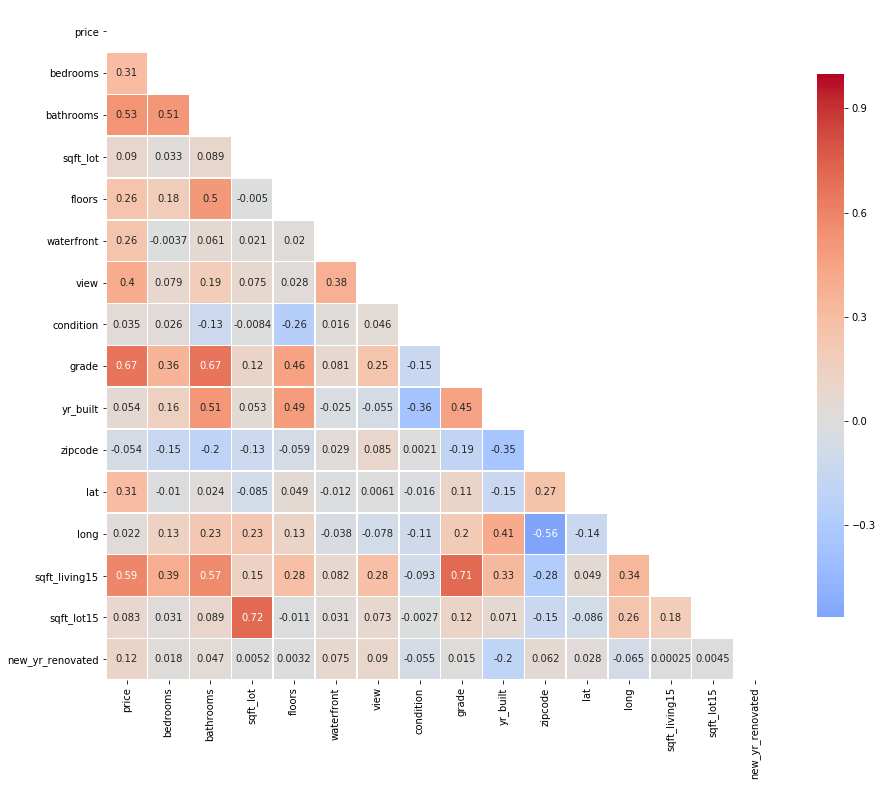

In [32]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

# Normalization: Log Transformation 

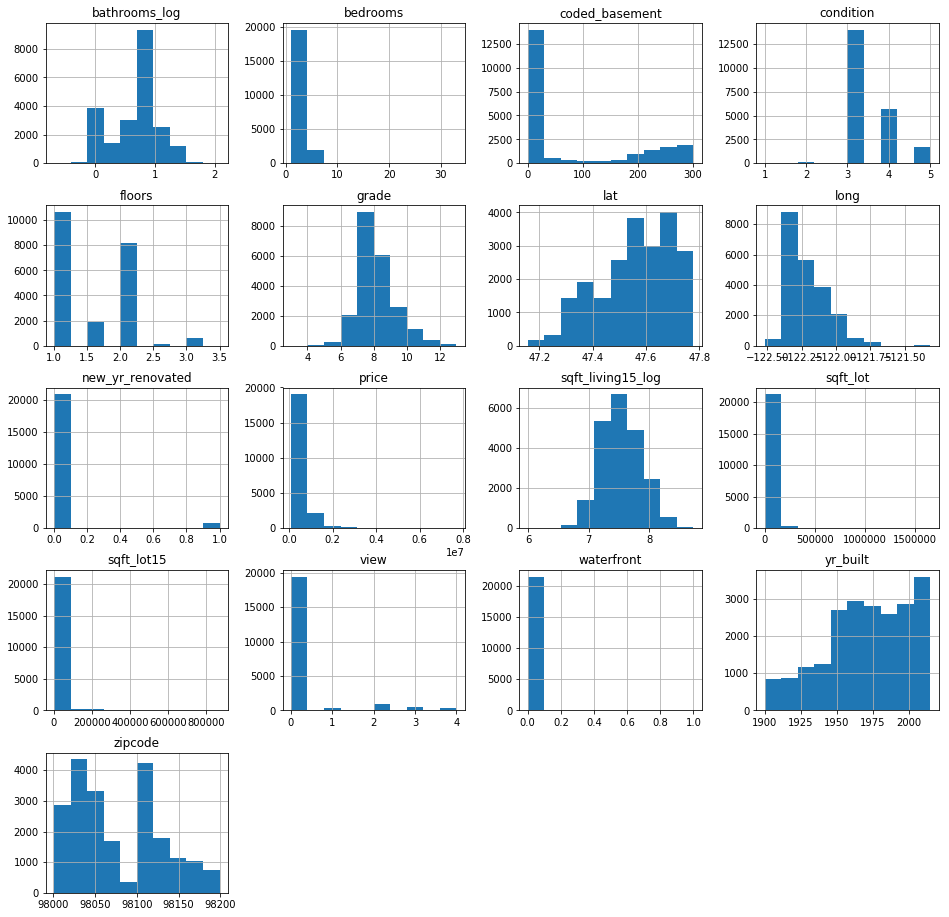

In [122]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] =(16,16)
data.hist();

In [123]:
log_cols= ['bathrooms','sqft_living15','yr_built','zipcode']

for col in log_cols:
    data[col+'_log'] = np.log(data[col])
    

KeyError: 'bathrooms'

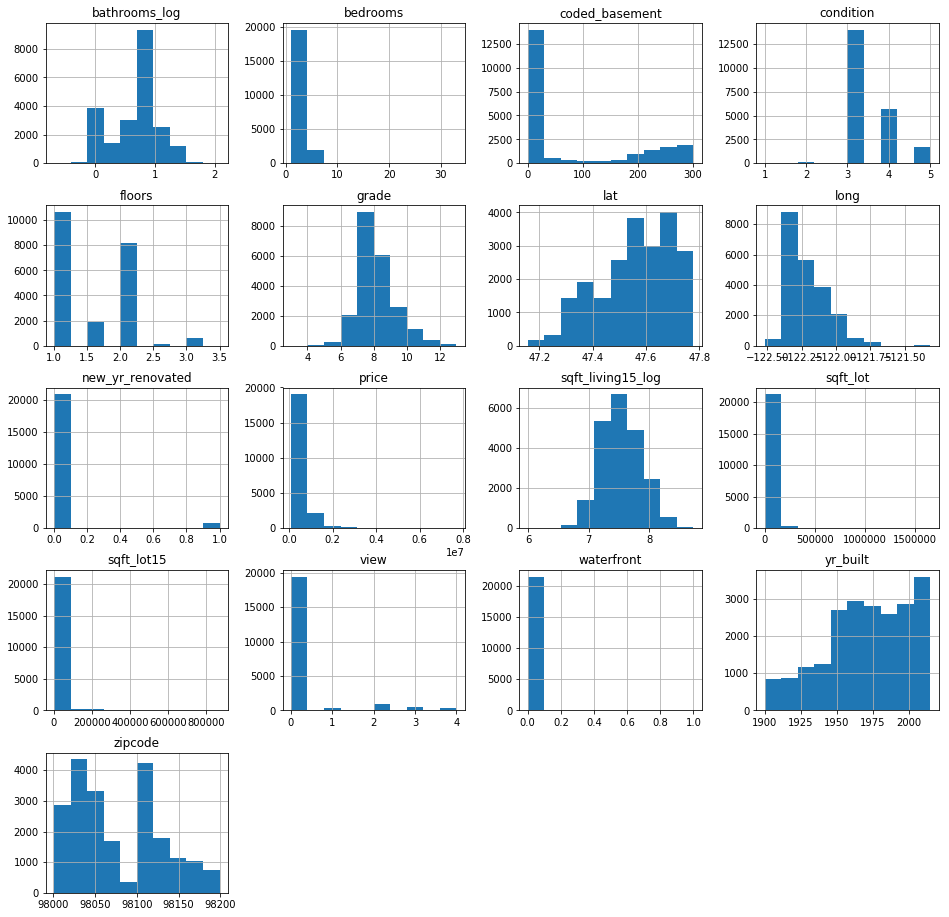

In [124]:
data.hist();

# Observation: 
It looks like **bathrooms_log** and **sqft_living15_log** normalized using log. The other log columns did not change. 

In [125]:
data.drop('bathrooms', axis=1, inplace=True)

KeyError: "['bathrooms'] not found in axis"

In [37]:
data.drop('col_log', axis=1, inplace=True)

KeyError: "['col_log'] not found in axis"

In [38]:
data.drop(['sqft_living15','yr_built_log','zipcode_log'], axis=1, inplace=True)

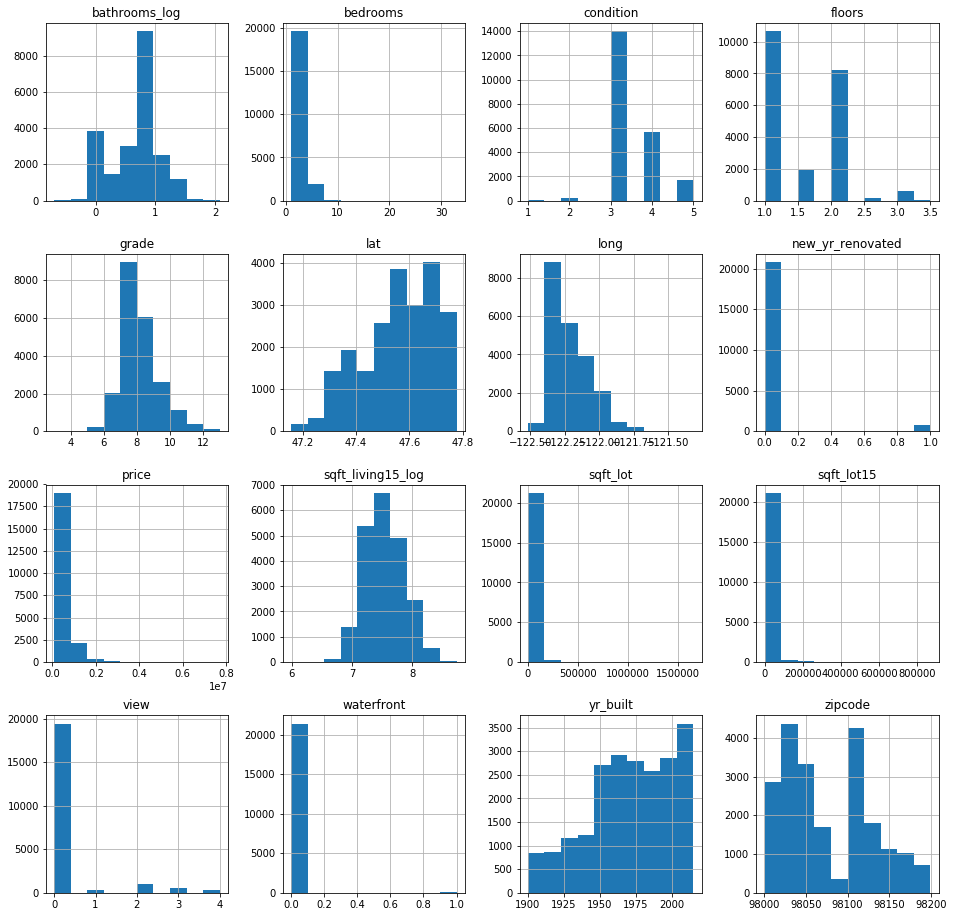

In [39]:
data.hist();

# Standardization 
Categorical Values: **view**, **waterfront**, **zipcode**

Ordinal Data: **bedrooms**, **bathrooms**, **floors**, **view**, **grade**,

In [126]:
data.describe().round(3)

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long,sqft_lot15,new_yr_renovated,bathrooms_log,sqft_living15_log,coded_basement
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,540057.664,3.373,15090.596,1.494,0.007,0.234,3.410,7.657,1971.002,98077.939,47.560,-122.214,12751.080,0.035,0.678,7.539,77.159
std,366059.581,0.926,41380.210,0.540,0.082,0.766,0.651,1.173,29.376,53.507,0.139,0.141,27255.483,0.183,0.392,0.327,112.067
min,78000.000,1.000,520.000,1.000,0.000,0.000,1.000,3.000,1900.000,98001.000,47.156,-122.519,651.000,0.000,-0.693,5.989,0.000
25%,322000.000,3.000,5040.000,1.000,0.000,0.000,3.000,7.000,1951.000,98033.000,47.471,-122.328,5100.000,0.000,0.560,7.307,0.000
50%,450000.000,3.000,7617.000,1.500,0.000,0.000,3.000,7.000,1975.000,98065.000,47.572,-122.230,7620.000,0.000,0.811,7.518,0.000
75%,645000.000,4.000,10687.750,2.000,0.000,0.000,4.000,8.000,1997.000,98118.000,47.678,-122.125,10083.000,0.000,0.916,7.766,201.000
max,7700000.000,33.000,1651359.000,3.500,1.000,4.000,5.000,13.000,2015.000,98199.000,47.778,-121.315,871200.000,1.000,2.079,8.734,301.000


In [127]:
cat_cols = ['waterfront','coded_basement']
num_cols = data.drop(['waterfront','coded_basement','price'],axis=1).columns

In [128]:
num_cols

Index(['bedrooms', 'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15', 'new_yr_renovated',
       'bathrooms_log', 'sqft_living15_log'],
      dtype='object')

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [130]:
scaled_data = scaler.fit_transform(data[num_cols])

/Users/johnofrecio/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/johnofrecio/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [131]:
try:
    scaled_data = scaler.fit_transform(data[num_cols])
except:
    print('I dont know what to do')

/Users/johnofrecio/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/johnofrecio/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Models 
Predictors: Based on the linear relationship to price, I will be testing my model using these 4 main variable: 
            1. Basement (**coded_basement**)
            2. The square footage of interior housing living space for the nearest 15 neighbors    (**sqft_living15_log**)
            3. The grade level of the house (**grade**)
            4. location (**lat**)

In [132]:
from statsmodels.formula.api import ols

In [158]:
outcome = 'price'
x_cols = ['coded_basement','sqft_living15_log', 'grade','lat']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5841.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:16:43   Log-Likelihood:            -2.9850e+05
No. Observations:               21534   AIC:                         5.970e+05
Df Residuals:                   21529   BIC:                         5.971e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.177e+07   6.03e+05    -52.672      0.000    -3.3e+07   -3.06e+07
coded_basement      184.9195     15.495     11.934      0.000     154.548     215.291
sqft_living15_log  1.954e+05   7285.865     26.822      0.000    1.81e+05     2.1e+05
grade              1.628e+05   2046.268     79.569      0.000    1.59e+05    1.67e+05
lat                6.219e+05   1.26e+04     49.236      0.000    5.97e+05    6.47e+05
==============================================================================
Omnibus:                    22242.958   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3441413.889
Skew:                           4.834   Prob(JB):                         0.00
Kurtosis:                      64.172   Cond. No.                     4.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

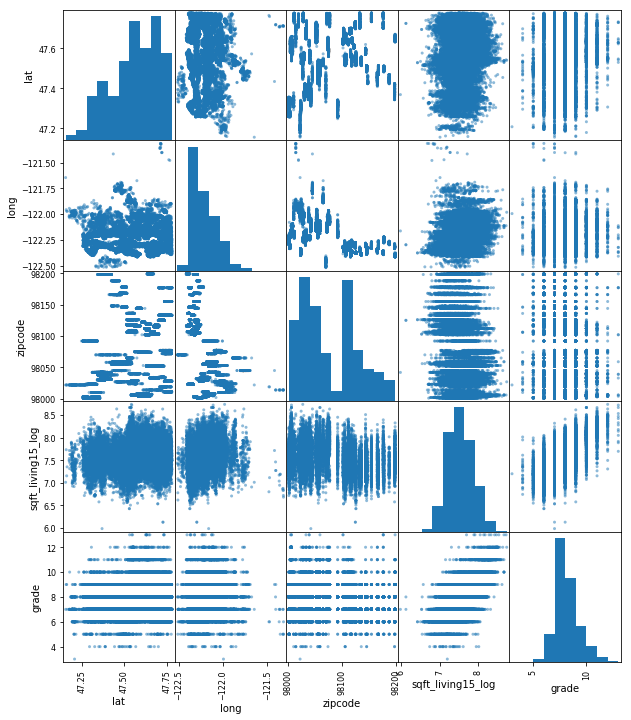

In [49]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [147]:
outcome = 'price'
predictors = (['coded_basement','sqft_living15_log', 'grade','lat'])
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum

In [148]:
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5841.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:56:51   Log-Likelihood:            -2.9850e+05
No. Observations:               21534   AIC:                         5.970e+05
Df Residuals:                   21529   BIC:                         5.971e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.177e+07   6.03e+05    -52.672      0.000    -3.3e+07   -3.06e+07
coded_basement      184.9195     15.495     11.934      0.000     154.548     215.291
sqft_living15_log  1.954e+05   7285.865     26.822      0.000    1.81e+05     2.1e+05
grade              1.628e+05   2046.268     79.569      0.000    1.59e+05    1.67e+05
lat                6.219e+05   1.26e+04     49.236      0.000    5.97e+05    6.47e+05
==============================================================================
Omnibus:                    22242.958   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3441413.889
Skew:                           4.834   Prob(JB):                         0.00
Kurtosis:                      64.172   Cond. No.                     4.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation 

In [149]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1).values
y = data['price'].values

X_train, X_Test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [150]:
var_name = ['X_train', 'X_Test','y_train', 'y_test']
var_list = [X_train, X_Test, y_train, y_test]
var_dict = dict(zip(var_name, var_list))

for name,var in var_dict.items():
    print(f"\nVariable: {name}")
    print(f"Data type: {type(var)}")
    print(f"Data Shape: {var.shape}")


Variable: X_train
Data type: <class 'numpy.ndarray'>
Data Shape: (17227, 16)

Variable: X_Test
Data type: <class 'numpy.ndarray'>
Data Shape: (4307, 16)

Variable: y_train
Data type: <class 'numpy.ndarray'>
Data Shape: (17227,)

Variable: y_test
Data type: <class 'numpy.ndarray'>
Data Shape: (4307,)


In [151]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_Test)

In [155]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_hat_train)
train_r2 = r2_score(y_train, y_hat_train)

test_mse = mean_squared_error(y_test, y_hat_test)
test_r2 = r2_score(y_test, y_hat_test)

print ('Train Mean Squarred Error:', train_mse)
print ('Test Mean Squarred Error:', test_mse)
       
print('\nTrain R-Squared:', train_r2)
print('Test R-squared:', test_r2)

Train Mean Squarred Error: 45592344919.44828
Test Mean Squarred Error: 57595068843.52985

Train R-Squared: 0.650592334846081
Test R-squared: 0.6108097350133693


# K-Fold Validation 

In [153]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring= 'neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring= 'neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring= 'neg_mean_squared_error'))

print('VC RESULTS')
print(f"Folds=5, score={cv_5_results}")
print(f"Folds=10, score={cv_10_results}")
print(f"Folds=20, score={cv_20_results}")

VC RESULTS
Folds=5, score=-48415599462.33136
Folds=10, score=-48349144122.15642
Folds=20, score=-48193086937.68425


# Conclusion: 
The variables used does not really reflect a high r squared or at least reach the threshold of .65  While I was able to go through my model, I believe that an improvement in cleaning up the data would result in a much better r squared.  I am eager to see what improvements I need to do to raise the r squared in my model.  

# How did you pick the question(s) that you did?

    The main goal for a business is to make money.  In this specific example, if a real estate company can leverage and successfully predict the prices of houses in the future (or at least come close), then they hold a competetive advantage of others and can quickly build up their business.  The main factor behind each of the methods I used for cleaning the data was making sure that there are no missing data (or at least fill them to the best of my knowledge), standardize their data so it will be consistent when putting them in our model, and dropping any data that won't contribute to our model. 
    
With the current model right now, I would probably need more time to examine the data before I recommend which variables can successfully predict house prices in the future in King County, Washington. 
   
